# Glass Identification

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Downloading the dataset
url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv"
glass_data = pd.read_csv(url)

# Displaying the first few rows of the dataset to understand its structure
glass_data.head()


,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [2]:
# Checking column names for any leading or trailing whitespaces
glass_data.columns.tolist()


['1',
 '1.52101',
 '13.64',
 '4.49',
 '1.10',
 '71.78',
 '0.06',
 '8.75',
 '0.00',
 '0.00.1',
 '1.1']

In [3]:
# Removing leading and trailing whitespaces in column names
glass_data.columns = glass_data.columns.str.strip()

# Checking column names again
glass_data.columns.tolist()


['1',
 '1.52101',
 '13.64',
 '4.49',
 '1.10',
 '71.78',
 '0.06',
 '8.75',
 '0.00',
 '0.00.1',
 '1.1']

In [4]:
# Counting occurrences of each glass type
glass_type_counts = glass_data['Type'].value_counts()

# Creating a bar plot
glass_type_counts.plot(kind='bar')
plt.title('Distribution of Glass Types')
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.show()


KeyError: 'Type'

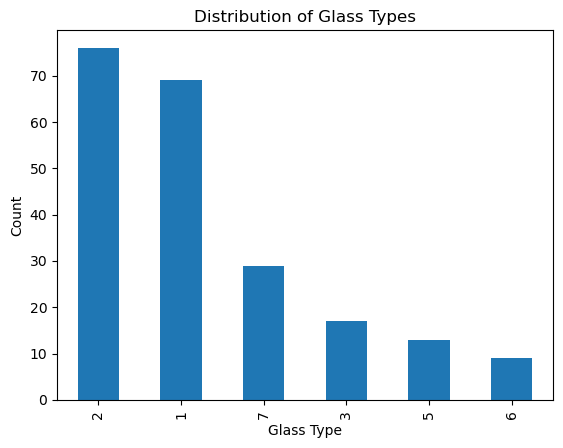

In [5]:
# Renaming columns based on the output
glass_data.columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

# Now, let's visualize the distribution of glass types
glass_type_counts = glass_data['Type'].value_counts()
glass_type_counts.plot(kind='bar')
plt.title('Distribution of Glass Types')
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.show()


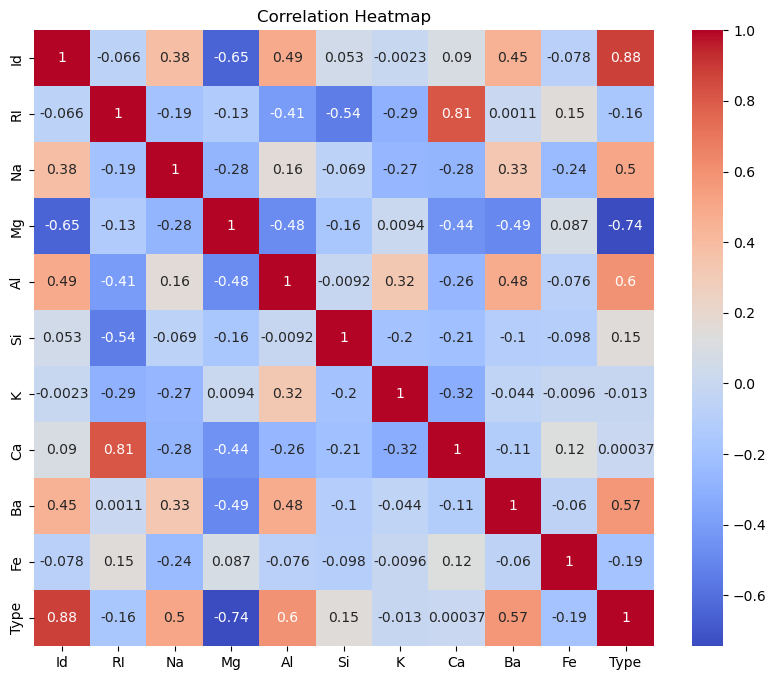

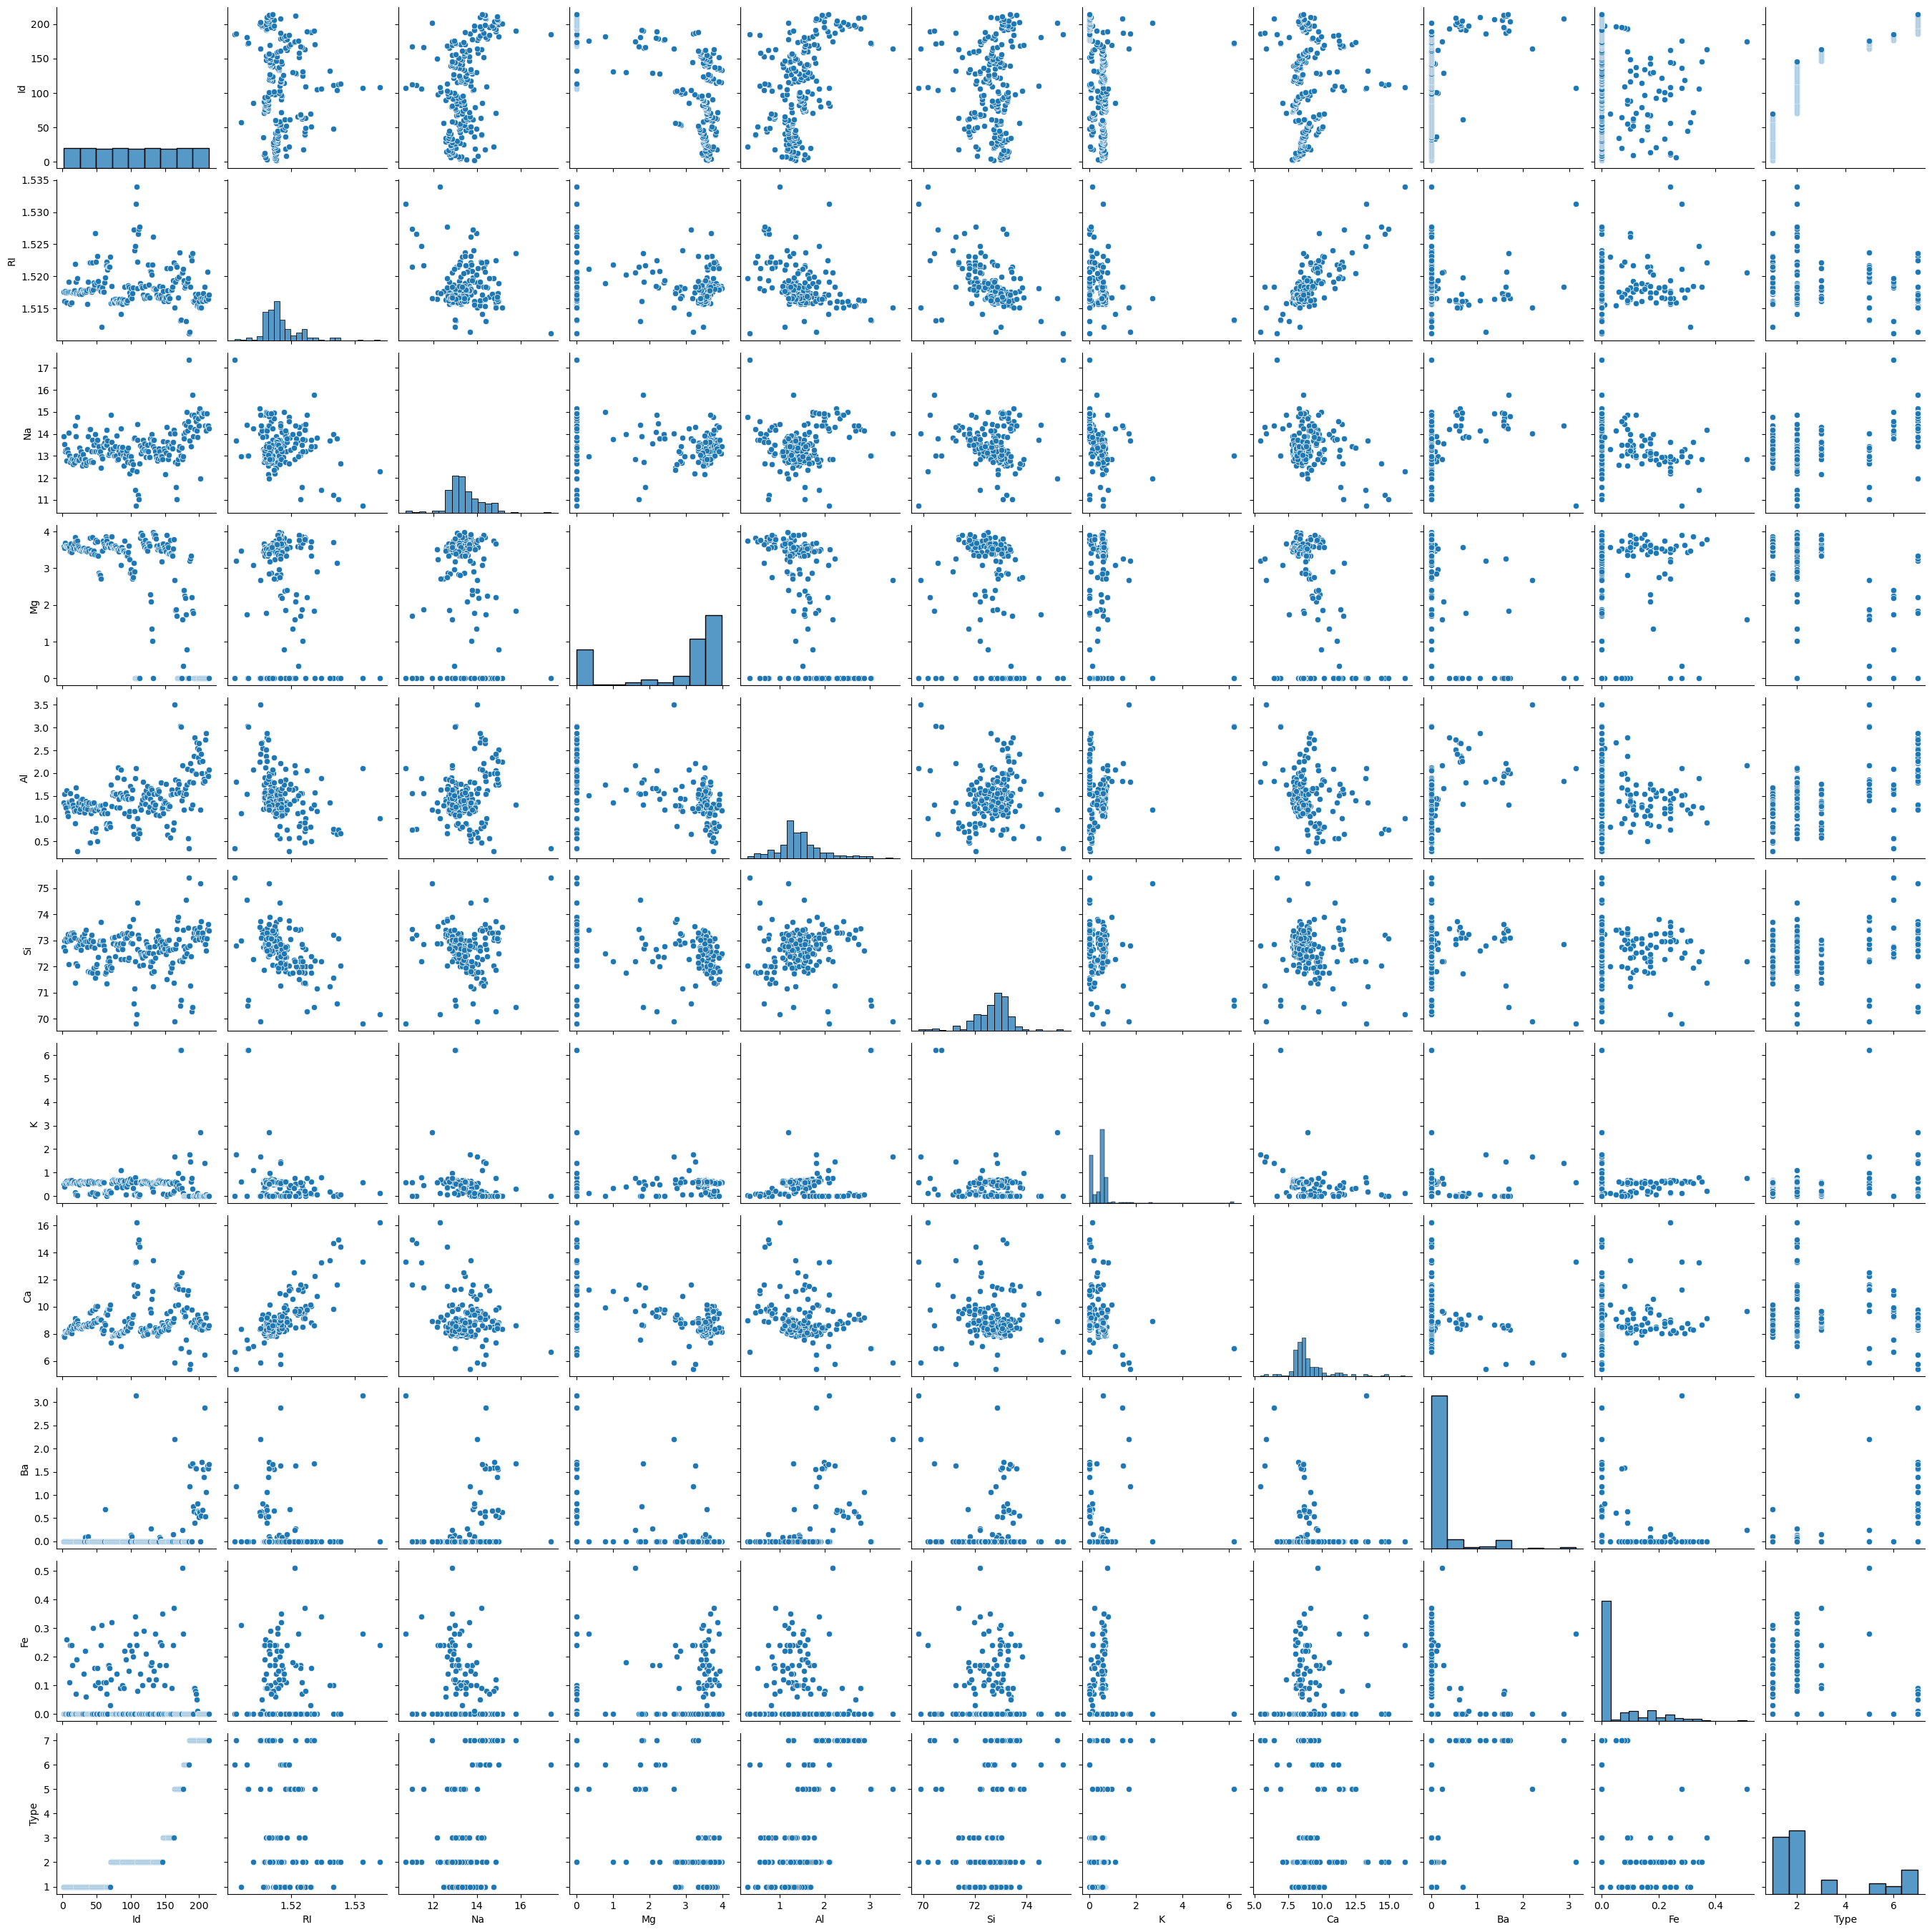

In [6]:
# Exploratory Data Analysis (EDA)
# Summary statistics
glass_data.describe()

# Checking for missing values
glass_data.isnull().sum()

# Visualizing the correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(glass_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for visualizing relationships between features
sns.pairplot(glass_data)
plt.show()


Accuracy: 0.6744186046511628
              precision    recall  f1-score   support

           1       0.55      0.60      0.57        10
           2       0.65      0.73      0.69        15
           3       0.00      0.00      0.00         3
           5       0.60      1.00      0.75         3
           6       1.00      0.67      0.80         3
           7       1.00      0.78      0.88         9

    accuracy                           0.67        43
   macro avg       0.63      0.63      0.61        43
weighted avg       0.67      0.67      0.66        43



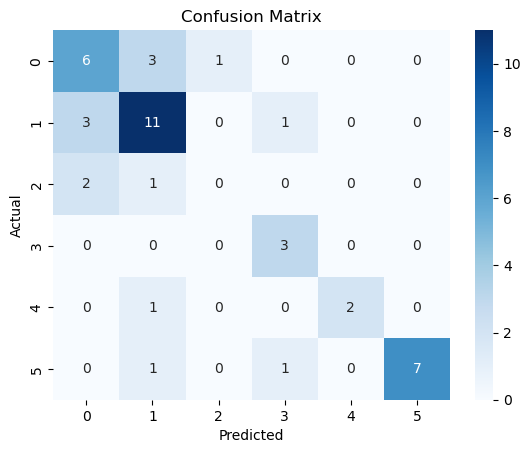

In [8]:
# Data Preprocessing
# Splitting the data into features and target variable
X = glass_data.drop(['Id', 'Type'], axis=1)
y = glass_data['Type']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = svm_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Student grades prediction

In [9]:
# Importing necessary libraries
import pandas as pd

# Downloading the dataset
url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv"
grades_data = pd.read_csv(url)

# Displaying the first few rows of the dataset to understand its structure
grades_data.head()


,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


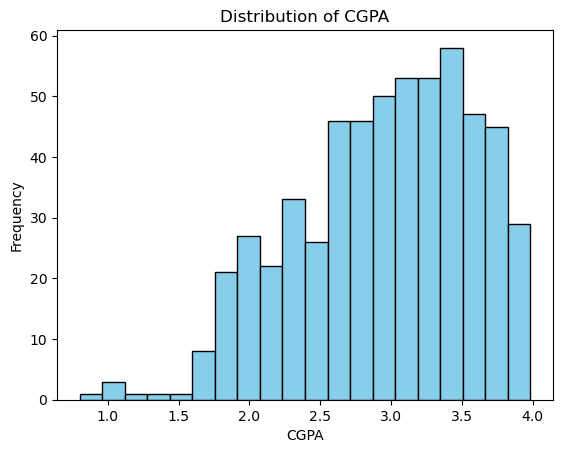

In [10]:
# Summary statistics
grades_data.describe()

# Checking for missing values
grades_data.isnull().sum()

# Checking data types of columns
grades_data.dtypes

# Visualizing the distribution of CGPA
plt.hist(grades_data['CGPA'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.title('Distribution of CGPA')
plt.show()


In [11]:
# Data Preprocessing
# Splitting the data into features and target variable
X = grades_data.drop(['Seat No', 'CGPA'], axis=1)
y = grades_data['CGPA']

# Encoding categorical variables if necessary (if any categorical variables are present)
# For now, let's assume all columns are numerical

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building
# Let's start with a simple linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = model.predict(X_test)

# Evaluating the model
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))


KeyError: "['Seat No'] not found in axis"

In [12]:
# Checking column names
print(grades_data.columns.tolist())


['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA']


In [13]:
# Data Preprocessing
# Splitting the data into features and target variable
X = grades_data.drop(['Seat No.', 'CGPA'], axis=1)
y = grades_data['CGPA']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building
# Let's start with a simple linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = model.predict(X_test)

# Evaluating the model
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))


ValueError: could not convert string to float: 'A'

In [14]:
# Checking data types of columns
print(grades_data.dtypes)


Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object


In [15]:
# Importing LabelEncoder from scikit-learn
from sklearn.preprocessing import LabelEncoder

# Applying label encoding to course code columns
label_encoder = LabelEncoder()
for column in X.columns:
    X[column] = label_encoder.fit_transform(X[column])

# Now that the course code columns are encoded, we can proceed with model training
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building
# Let's start with a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

# Evaluating the model
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))


NameError: name 'mean_absolute_error' is not defined

In [16]:
# Importing necessary functions for model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model Evaluation
y_pred = model.predict(X_test)

# Evaluating the model
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 0.08477238204211913
Mean Squared Error: 0.01485525484943143
R-squared Score: 0.9553611454688398


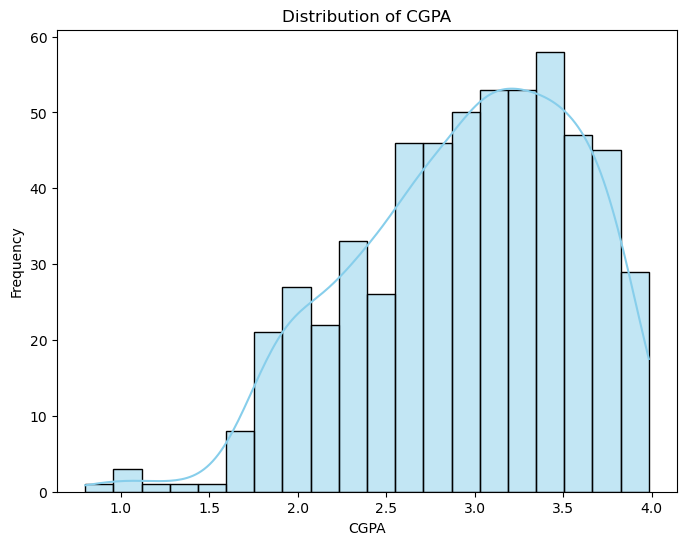

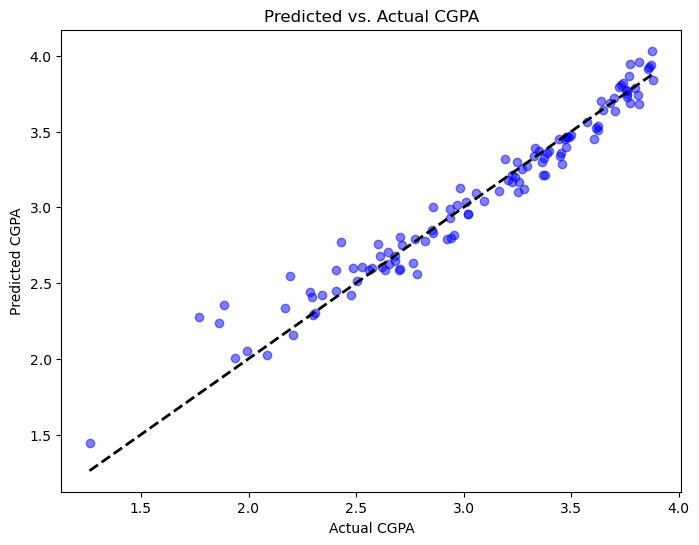

TypeError: residplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

<Figure size 800x600 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of CGPA
plt.figure(figsize=(8, 6))
sns.histplot(grades_data['CGPA'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot of Predicted vs. Actual CGPA
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Predicted vs. Actual CGPA')
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(y_pred, residuals, lowess=True, color='r')
plt.title('Residual Plot')
plt.xlabel('Predicted CGPA')
plt.ylabel('Residuals')
plt.show()


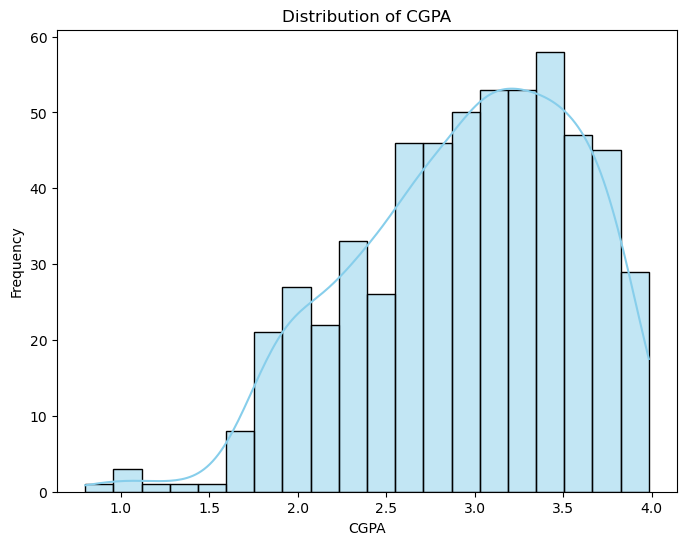

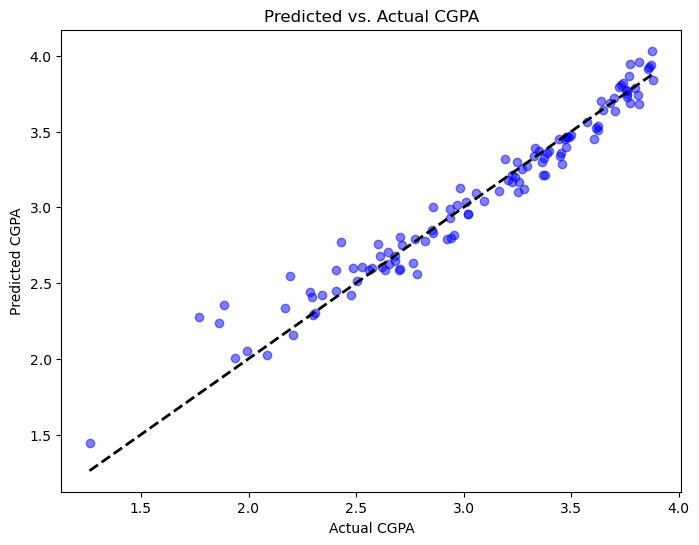

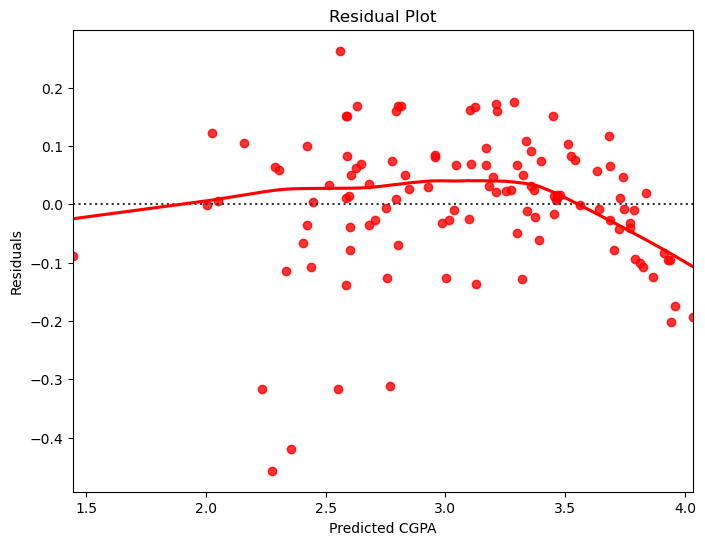

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of CGPA
plt.figure(figsize=(8, 6))
sns.histplot(grades_data['CGPA'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot of Predicted vs. Actual CGPA
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Predicted vs. Actual CGPA')
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.show()

# Residual Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='r')
plt.title('Residual Plot')
plt.xlabel('Predicted CGPA')
plt.ylabel('Residuals')
plt.show()
